In [53]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread


# Loading Data

In [54]:
# !unzip drive/MyDrive/cell_images.zip


In [57]:
test_path = "cell_images/test"
train_path = "cell_images/train"

In [58]:
test_path

'cell_images/test'

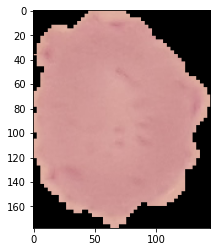

In [59]:
para_cell = "cell_images/train/uninfected/C99P60ThinF_IMG_20150918_142128_cell_56.png"
plt.imshow(imread(para_cell))

In [60]:
os.listdir()

['.config', 'drive', 'cell_images', 'sample_data']

In [61]:
data_dir = "cell_images"

In [62]:
os.listdir(data_dir)

['test', 'train']

In [63]:
test_path = data_dir + "/test"
train_path = data_dir + "/train"

In [64]:
test_path

'cell_images/test'

In [65]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [66]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [67]:
os.listdir(train_path + "/parasitized")[0]

'C183P144NThinF_IMG_20151201_223758_cell_135.png'

In [68]:
para_cell = train_path + "/parasitized" + "/C116P77ThinF_IMG_20150930_171739_cell_100.png"

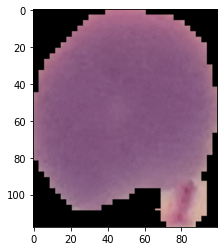

In [69]:
plt.imshow(imread(para_cell))

In [70]:
os.listdir(train_path + "/uninfected")[0]


'C212ThinF_IMG_20151106_110411_cell_166.png'

In [71]:
uninfected = train_path + "/uninfected/" + os.listdir(train_path + "/uninfected")[0]


In [72]:
uninfected

'cell_images/train/uninfected/C212ThinF_IMG_20151106_110411_cell_166.png'

In [73]:
uninfected_cell = imread(uninfected)

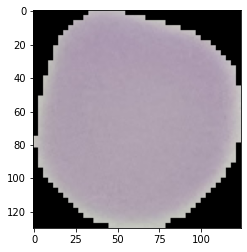

In [74]:
plt.imshow(uninfected_cell)

In [75]:
pwd

'/content'

In [76]:
len(os.listdir(test_path + "/parasitized"))

1300

In [77]:
len(os.listdir(test_path + "/uninfected"))

1300

In [78]:
# determining image shape to use

dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+"/uninfected"):

  img = imread(test_path + "/uninfected/" + image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

In [79]:
dim2

[106,
 112,
 109,
 148,
 124,
 121,
 139,
 124,
 136,
 139,
 163,
 118,
 124,
 130,
 133,
 163,
 136,
 145,
 130,
 148,
 127,
 151,
 151,
 136,
 139,
 124,
 133,
 130,
 154,
 154,
 127,
 115,
 136,
 121,
 145,
 151,
 139,
 124,
 115,
 133,
 139,
 100,
 124,
 121,
 142,
 175,
 133,
 124,
 148,
 112,
 154,
 112,
 136,
 157,
 145,
 157,
 121,
 136,
 139,
 115,
 94,
 106,
 115,
 154,
 127,
 100,
 142,
 133,
 112,
 139,
 136,
 118,
 142,
 121,
 133,
 157,
 157,
 118,
 142,
 124,
 118,
 100,
 142,
 139,
 124,
 136,
 112,
 130,
 127,
 124,
 118,
 145,
 133,
 124,
 124,
 64,
 169,
 130,
 148,
 151,
 151,
 169,
 136,
 112,
 136,
 127,
 118,
 94,
 133,
 118,
 136,
 145,
 118,
 130,
 139,
 145,
 133,
 133,
 127,
 124,
 112,
 121,
 142,
 139,
 148,
 133,
 127,
 133,
 97,
 121,
 127,
 112,
 121,
 115,
 115,
 127,
 139,
 121,
 127,
 130,
 133,
 133,
 142,
 121,
 130,
 145,
 133,
 127,
 154,
 133,
 118,
 118,
 139,
 112,
 118,
 124,
 118,
 139,
 121,
 124,
 151,
 112,
 109,
 178,
 121,
 145,
 115,
 1

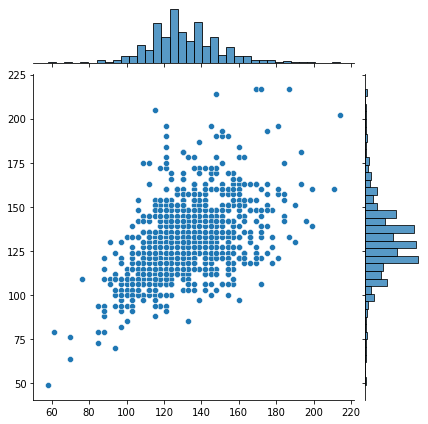

In [146]:
sns.jointplot(x=dim1, y=dim2)

In [81]:
np.mean(dim1)

130.92538461538462

In [82]:
np.mean(dim2)

130.75

In [83]:
image_shape = (130,130,3)

# Data Preprocessing

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [86]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode="nearest")

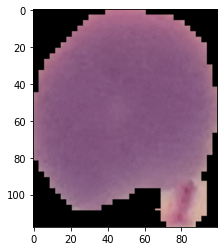

In [87]:
para_img = imread(para_cell)
plt.imshow(para_img)

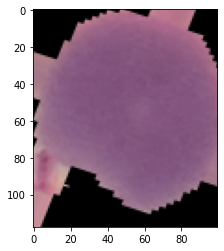

In [88]:
plt.imshow(image_gen.random_transform(para_img))

In [89]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [90]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [91]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating Model

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [93]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [95]:
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [97]:
batch_size = 16

In [98]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size=image_shape[:2], 
                                                color_mode="rgb", 
                                                batch_size=batch_size,
                                                class_mode="binary")

Found 24958 images belonging to 2 classes.


In [99]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size=image_shape[:2], 
                                                color_mode="rgb", 
                                                batch_size=batch_size,
                                                class_mode="binary", shuffle=False)

Found 2600 images belonging to 2 classes.


In [100]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [101]:
# loaded in model file rather than training again (2h) 
# results = model.fit_generator(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

# Model Evaluation

In [103]:
from tensorflow.keras.models import load_model

model = load_model("malaria_detector.h5")

In [104]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [126]:
model.evaluate(test_image_gen)

163/163 [==============================] - 13s 79ms/step - loss: 37.4806 - accuracy: 0.8712


[37.48064041137695, 0.8711538314819336]

In [106]:
model.metrics_names

['loss', 'accuracy']

In [127]:
pred = model.predict(test_image_gen)

In [128]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [129]:
predictions = pred > 0.5

In [130]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [131]:
len(pred)

2600

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [133]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [134]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1300
           1       0.97      0.77      0.86      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.87      2600
weighted avg       0.89      0.87      0.87      2600



In [135]:
confusion_matrix(test_image_gen.classes, predictions)

array([[1274,   26],
       [ 305,  995]])

In [136]:
para_cell

'cell_images/train/parasitized/C116P77ThinF_IMG_20150930_171739_cell_100.png'

# Playing around with tensorflow image preprocessing

In [137]:
from tensorflow.keras.preprocessing import image

In [138]:
my_image = image.load_img(para_cell, target_size=image_shape)

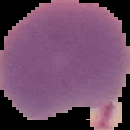

In [139]:
my_image

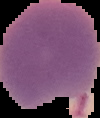

In [140]:
image.load_img(para_cell)

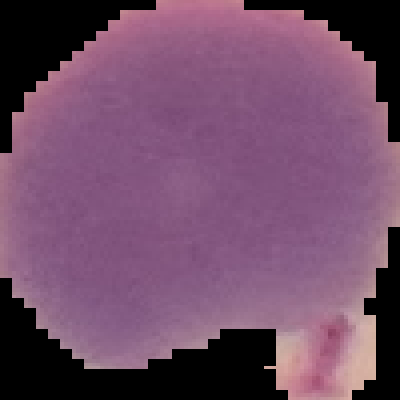

In [141]:
my_image = image.load_img(para_cell, target_size=(400,400))
my_image

In [142]:
my_img_arr = image.img_to_array(my_image)

In [143]:
my_img_arr.shape

(400, 400, 3)

In [144]:
my_img_arr = np.expand_dims(my_img_arr, axis=0)